In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import csv
import sys
import numpy as np
# import cugraph

In [2]:
maxInt = sys.maxsize
while True:
    # decrease the maxInt value by factor 10
    # as long as the OverflowError occurs.
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

In [3]:
# Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category

#Read Data from csv
# filename = "./data/Data_API.csv"
# with open(filename,'r', encoding='UTF-8') as f:
#      reader = csv.reader(f)
#      header = next(reader)
#      seller_address_list = []
#      buyer_address_list = []
#      category_list=[]
#      for row in reader:
#          seller_address_list.append(row[3])
#          buyer_address_list.append(row[5])
#          category_list.append(row[23])
# edge_list = list(zip(seller_address_list, buyer_address_list))

In [4]:
data_api_path="./data/Data_API_mapped.csv"
art_path="./data/Art_mapped.csv"
collectible_path="./data/Collectible_mapped.csv"
games_path="./data/Games_mapped.csv"
metaverse_path="./data/Metaverse_mapped.csv"
utility_path="./data/Utility_mapped.csv"
other_path="./data/Other_mapped.csv"

In [5]:
filepath = games_path
with open(filepath, 'r', encoding='UTF-8') as f:
     reader = csv.reader(f)
     seller_address_list = []
     buyer_address_list = []
     for row in reader:
         seller_address_list.append(row[0])
         buyer_address_list.append(row[1])
edge_list = list(zip(seller_address_list, buyer_address_list))

In [6]:
G = nx.MultiDiGraph()
G.add_edges_from(edge_list)

[0,
 0,
 1,
 1,
 2,
 3,
 4,
 5,
 0,
 2,
 1,
 2,
 3,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 0,
 8,
 6,
 7,
 0,
 5,
 0,
 0,
 9,
 10,
 11,
 12,
 13,
 1,
 0,
 8,
 0,
 9,
 10,
 14,
 15,
 11,
 16,
 17,
 12,
 18,
 19,
 0,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 1,
 29,
 30,
 13,
 14,
 15,
 16,
 0,
 1,
 2,
 3,
 31,
 0,
 32,
 33,
 34,
 35,
 36,
 0,
 37,
 38,
 0,
 0,
 4,
 1,
 1,
 2,
 3,
 2,
 3,
 4,
 4,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 39,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 0,
 22,
 1,
 40,
 41,
 42,
 2,
 43,
 44,
 0,
 45,
 46,
 47,
 48,
 49,
 50,
 0,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 0,
 58,
 59,
 0,
 0,
 60,
 1,
 2,
 3,
 61,
 5,
 62,
 63,
 64,
 0,
 1,
 0,
 4,
 65,
 66,
 1,
 0,
 2,
 3,
 1,
 67,
 0,
 68,
 0,
 1,
 69,
 70,
 71,
 2,
 72,
 73,
 74,
 75,
 76,
 17,
 77,
 78,
 79,
 18,
 19,
 80,
 81,
 82,
 0,
 20,
 21,
 83,
 84,
 85,
 86,
 22,
 0,
 1,
 2,
 87,
 88,
 3,
 4,
 5,
 6,
 0,
 1,
 89,
 0,
 1,
 90,
 0,
 91,
 0,
 1,
 2,
 0,
 3,


In [7]:
#1. Ouput the number of nodes and edges
nodes = G.number_of_nodes()
edges = G.number_of_edges()
print("1. Number of nodes and edges: ",nodes,"  ",edges)

1. Number of nodes and edges:  282915    2271446


In [8]:
#2. Ouput the average in-degree and out-degree
sum_of_in_degree=0
in_degree_list=[]
sum_of_out_degree=0
out_degree_list=[]
degree_list=[]
for node in G.nodes:
    temp_in=G.in_degree(node)
    temp_out=G.out_degree(node)
    sum_of_in_degree+=temp_in
    sum_of_out_degree+=temp_out

    in_degree_list.append(temp_in)
    out_degree_list.append(temp_out)
    degree_list.append(temp_in+temp_out)

avg_out_degree=sum_of_out_degree/nodes
avg_in_degree=sum_of_in_degree/nodes
print("2. Average in-degree: ",avg_in_degree)
print("3. Average out-degree: ",avg_out_degree)
#3. Ouput the average degree(i.e., sum of in-degree and out-degree)
avg_degree=(sum_of_in_degree+sum_of_out_degree)/nodes
print("5. Average degree: ",avg_degree)

2. Average in-degree:  8.028722407790326
3. Average out-degree:  8.028722407790326
5. Average degree:  16.057444815580652


0


Text(0, 0.5, 'Count,P(K)*n')

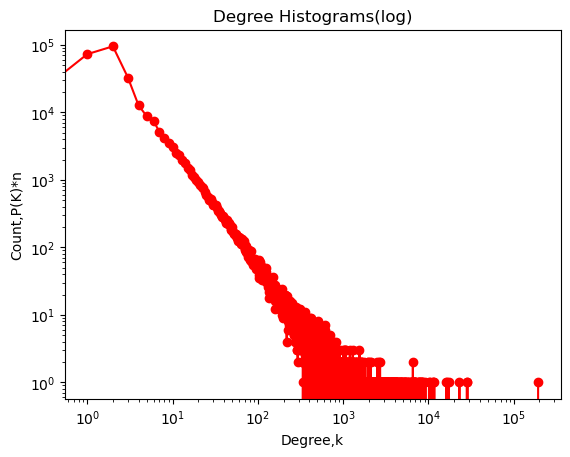

In [9]:
degree_counts = Counter(degree_list)
degree_freq = [degree_counts.get(i,0) for i in range(max(degree_counts)+1)]
degrees = range(len(degree_freq))

#log-log
print(degree_counts.get(0,0))
plt.title("Degree Histograms(log)")
plt.loglog(degrees,degree_freq,'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

In [ ]:
# compute distance
dis_seq = []
path_len = nx.all_pairs_shortest_path_length(G)

for s, s2t in path_len:
  dis_seq += list(s2t.values())
# for i,node1 in enumerate(G.nodes):
#     for node2 in G.nodes:
#         if nx.has_path(G,node1,node2):
#             dis=nx.shortest_path_length(G,node1,node2)
#             dis_seq.append(dis)
#     print("-----{} nodes----".format(i))

dis_counts = Counter(dis_seq)
dis_freq = [dis_counts.get(d,0) for d in range(max(dis_counts)+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance(log)")
plt.loglog(dis,dis_freq,'ro-')
plt.xlabel('distence (hops)')
plt.ylabel('Number of paths')

In [ ]:
#Calculate average path
avg_path=sum(dis_seq)/(len(dis_seq)-nodes)
print(avg_path)

In [ ]:
G_weighted=nx.DiGraph()
for u,v in G.edges():
    if G_weighted.has_edge(u,v):
        G_weighted[u][v]['weight'] += 1
    else:
        G_weighted.add_edge(u, v, weight=1)

In [ ]:
coef = nx.clustering(G_weighted)
coef = np.array(list(coef.values()))

degree_unique = np.unique(degree_list)
coef_degree_list = []

for d in np.unique(degree_unique):
  mask_d = (degree_list == d)
  coef_degree = coef[mask_d].mean()
  coef_degree_list.append(coef_degree)

In [ ]:
#log-log
plt.title("Average clustering coefficient versus degree(log)")
plt.loglog(degree_unique,coef_degree_list,'ro-')
plt.xlabel('k (degree)')
plt.ylabel('Ck (Clustering coefficient)')

In [ ]:
G_undirected=G.to_undirected()
component_list = list(nx.connected_components(G_undirected))
component_size_list = [len(_component) for _component in component_list]

component_count = Counter(component_size_list)
component_freq = [component_count.get(i,0) for i in range(max(component_count)+1)]
component_size = range(len(component_freq))
#log-log
print(component_count.get(0,0))
plt.title("Connected components versus size(log)")
plt.loglog(component_size ,component_freq,'ro-')
plt.xlabel('connected component size')
plt.ylabel('number of connected components')

In [ ]:
out_degree_centrality = nx.out_degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)

print("Out-degree centrality:", out_degree_centrality)
print("In-degree centrality:", in_degree_centrality)

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness centrality:", betweenness_centrality)

In [ ]:
constraint_centrality = nx.constraint(G)
print("Constraint centrality:", constraint_centrality)

In [ ]:
nx_close_centrality = nx.closeness_centrality(G)
print('closeness centrality:', nx_close_centrality)

In [ ]:
nx_eigen_centrality = nx.eigenvector_centrality(G_weighted,max_iter=10000).values()
print('eigenvector centrality:', nx_eigen_centrality)